# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a Data Scientist working for Airbnb, your task is to perform wine segmentation given the following dataset. The dataset is the result of a chemical analysis of wines
grown in the same region in Kenya but derived from three different cultivars.

### b) Defining the Metric for Success

The metrics we will use to evaluate our model is silhouette_score.

### c) Understanding the Context 

Champagne Company is a leading wine company that specializes in the importation and
distribution of premium and super-premium wines, champagnes, and spirits within the
East African region. The main goal of the company is to make the most exclusive brands
of wine more accessible at an affordable price. The company wants to satisfy the
growing local demand for specialized products and the ever-increasing tourism industry
where guests don´t want to settle for less.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

### a) Prerequisites

In [1]:
# Let's first import the libraries that we will need
# ----
#
import pandas as pd               # pandas for performing data manipulation
import numpy as np                # numpy for performing scientific computations
import matplotlib.pyplot as plt   # matplotlib for performing visualisation 
# Let's import our clustering algorithms 
# ---
# 
from sklearn.cluster import KMeans                        # Kmeans Clustering Algorithm
from sklearn.cluster import AgglomerativeClustering       # Hierachical Clustering Algorithm
# Silhouette Analysis
# ---
# 
from sklearn.metrics import silhouette_score
# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 

### b) Data Importation

In [2]:
# import the data
df = pd.read_csv('https://bit.ly/2UBJERh')
print(df.shape)
df.head()

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# <font color='#2F4F4F'>3. Exploratory Data Analysis</font>

We won't perform extensive exploration / cleaning / preparation / statistical analsysis steps here because our main focus for this part of the session is to apply clustering analysis to our dataset.

# <font color='#2F4F4F'>4. Data Modeling</font>

In [3]:
# During this step we select the data that we would like to work with.
# The following code will select all the values and store them in an array containing 
# a matrix that will contain our features. 
# This matrix will then be passed to our algorithm for clustering.
# ---
# 
X = df.iloc[:,].values

# Let's preview our resulting data. 
# We can make comparisons with the previewed data in the previous cell just to 
# confirm we put the right values in our matrix.
# ---
# 
X[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [4]:
# 
# Scaling our values to give them all equal importance. 
# Scaling is also important as the distance between points 
# affects the way clusters are formed.
# ---
# We need to have the data points of our features lie within 
# the same upper and lower limit.
# ---
# 
norm = MinMaxScaler().fit(X) 
X = norm.transform(X)
# X = norm.fit_transform(X)
X[:5]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913,
        0.62758621, 0.49578059, 0.49056604, 0.44479495, 0.25938567,
        0.45528455, 0.60805861, 0.32596291]])

### a) K-means Clustering

#### i) Silhouette Analysis

In [5]:
silhouette = [] # list of separation distance between the resulting clusters for each value of k 

K = range(2, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    silhouette.append(silhouette_score(X, kmeans.labels_))

silhouette

[0.29872218159747743,
 0.3008938518500134,
 0.2575387889204893,
 0.22030003303523854,
 0.20035514315474817,
 0.2072804991084045,
 0.13738591073656445,
 0.20549920100539518,
 0.15392138887488624,
 0.14129141781556334]

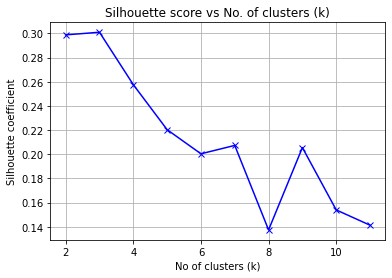

In [6]:
# We plot our Silhouette Plot
# ---
# 
plt.plot(range(2, 12), silhouette, 'bx-')
plt.title('Silhouette score vs No. of clusters (k)')
plt.xlabel('No of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid(True);

The silhouette plot shows the that the silhouette coefficient was highest when k = 3, suggesting that's the optimal number of clusters. Three clusters best captures the segmentation of this data set.

#### ii) Elbow method

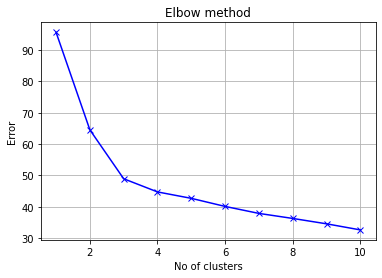

In [7]:
# Elbow Method
# ---
# We can also check the optimal values of K for our dataset through the use of the 
# elbow method as shown below.
# We will run the KMeans algorithm for different values of K (say K = 10 to 1) 
# and plot the K values against SSE(Sum of Squared Errors). 
# And select the value of K for the elbow point as shown in the figure.
# ---
# 

# We will first define an empy list where we will be required to store our errors
# ---
#
Error = []

# Then use a for loop to run KNN several times and append values the sum of squared errors 
# the error list created above. The values in this list willl then be plotted agains the no. of clusters.
# to create our elbow method visualisation.
# ---
#
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

# We plot our elbow method visualisation: No. of clusters vs Error
# ---
# 
plt.plot(range(1, 11), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

The output graph of the Elbow method is shown above. 
As we can see, the optimal value of k is 3, as the elbow-like shape is formed at k=3 in the above graph. We can implement k-means using k = 3.


In [8]:
# Lets now create the K-means clusterer that we will use to perform clustering analysis. 
# Because we want three clusters, we pass 3 to the clusterer. 
# ---
# In addition, we set random_state = 0, we would want to reproduce results 
# at some later point in time. 
# ----
# For further info about K-means, we can refer its documentation
# by following this link: https://bit.ly/2To6GKN. This will be useful 
# to explore other model parameters that you'll get to see as an output of this cell.
# ---
# 
clusterer = KMeans(3, random_state=0)

# Then passing our data the clusterer
# ---
# 
clusterer.fit(X)

KMeans(n_clusters=3, random_state=0)

In [9]:
clusterer.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [10]:
set(clusterer.labels_)

{0, 1, 2}

In [11]:
# We then use the predict method to return the cluster that each data point 
# belongs to and then store this in a new column of our dataframe.
# ---
# 
df['kmeans_cluster_group'] = clusterer.predict(X)
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,0
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502,2
107,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,2
44,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885,0
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560,1


In [12]:
# check for number of items in the cluster group
df.kmeans_cluster_group.value_counts()

2    62
0    61
1    55
Name: kmeans_cluster_group, dtype: int64

The data is evenly clustered into the three groups

In [13]:
# first cluster
first_cluster = df[df.kmeans_cluster_group == 0]
print(first_cluster.shape)
first_cluster.head()

(61, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [14]:
# first cluster
second_cluster = df[df.kmeans_cluster_group == 1]
print(second_cluster.shape)
second_cluster.head()

(55, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.250,1.67,680,1
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.980,1.59,450,1
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.020,1.93,750,1
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870,1
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.840,2.01,515,1


In [15]:
# third cluster
third_cluster = df[df.kmeans_cluster_group == 2]
print(third_cluster.shape)
third_cluster.head()

(62, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,2
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,2
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678,2


# <font color='#2F4F4F'>5. Summary of Findings</font>

<i> K-Means clustering algorithm was able to exclusively categorize the wines into three distinct groups based on the quantities of the 13 ingredients used to make the wine. This can be in turn used to determine the suitable price and customer segment for each drink

# <font color='#2F4F4F'>6. Recommendations</font>

<i>Champagne Company can utilize K-Means clustering to categorize the drinks into three distinct groups that can fetch different prices and fit for sale to different customer segments

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
<i> Yes, the analytics question was right to address the problem we needed to solve </i>

### b) Did we have the right data?
<i>The data was relevant in coming up with the model that could group the drinks into different categories</i>

### c) What can be done to improve the solution?
<i> More hyperparameter tuning can be done on the models to improve on the performance</i>